In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from prophet import Prophet
import datetime as dt
#pip install ipywidgets
import ipywidgets as widgets 
from IPython.display import display
# options = ['Option 1', 'Option 2', 'Option 3', 'Option 4']
#dropdown = widgets.Dropdown( options=options, value=options[0], # default selected value description='Select:', disabled=False, )
#display(dropdown)
#selected_value = dropdown.value

In [2]:
# Load data
a_path = Path("Resources/world_population_data.csv")
b_path = Path("Resources/Production_Crops_Livestock_E_All_Data.csv")
c_path = Path("Resources/API_SP.POP.TOTL_DS2_en_csv_v2_3401680.csv")
d_path = Path("Resources/Lists_test.csv")
world_population = pd.read_csv(a_path)
agri_data = pd.read_csv(b_path, encoding='ISO-8859-1', low_memory = False)
world_population_all_years = pd.read_csv(c_path)
category_ag_data = pd.read_csv(d_path)

In [3]:
# View Agricultural data
agri_data.info()
agri_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79606 entries, 0 to 79605
Columns: 195 entries, Area Code to Y2022N
dtypes: float64(62), int64(3), object(130)
memory usage: 118.4+ MB


,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2019N,Y2020,Y2020F,Y2020N,Y2021,Y2021F,Y2021N,Y2022,Y2022F,Y2022N
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,0.0,...,NaN,22134.0,A,NaN,36862.0,A,NaN,37000.0,A,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5419,Yield,100 g/ha,NaN,...,NaN,17759.0,A,NaN,17432.0,A,NaN,17297.0,A,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,t,0.0,...,NaN,39307.0,A,NaN,64256.0,A,NaN,64000.0,A,NaN
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,ha,0.0,...,NaN,25558.0,E,NaN,25357.0,E,NaN,25403.0,E,NaN
4,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5419,Yield,100 g/ha,NaN,...,NaN,7030.0,E,NaN,7050.0,E,NaN,7040.0,E,NaN


In [4]:
# View uniqe values in items
agri_data["Item"].unique()

array(['Almonds, in shell',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Asses', 'Barley',
       'Butter and ghee of sheep milk', 'Butter of cow milk',
       'Buttermilk, dry', 'Camels', 'Cantaloupes and other melons',
       'Cattle', 'Cattle fat, unrendered',
       'Cheese from milk of goats, fresh or processed',
       'Cheese from milk of sheep, fresh or processed', 'Chickens',
       'Cotton lint, ginned', 'Cotton seed', 'Cottonseed oil',
       'Edible offal of cattle, fresh, chilled or frozen',
       'Edible offal of goat, fresh, chilled or frozen',
       'Edible offal of sheep, fresh, chilled or frozen',
       'Edible offals of camels and other camelids, fresh, chilled or frozen',
       'Fat of camels', 'Figs', 'Game meat, fresh, chilled or frozen',
       'Goat fat, unrendered', 'Goats', 'Grapes',
       'Hen eggs in shell, fresh', 'Horses', 'Linseed', 'Maize (corn)',
       'Meat of camels, fresh or c

In [5]:
print(agri_data.columns)

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Unit', 'Y1961',
       ...
       'Y2019N', 'Y2020', 'Y2020F', 'Y2020N', 'Y2021', 'Y2021F', 'Y2021N',
       'Y2022', 'Y2022F', 'Y2022N'],
      dtype='object', length=195)


In [6]:
#Drop columns that are not needed
columns_to_drop =["Area Code", "Area Code (M49)", "Item Code", "Item Code (CPC)", "Element Code", "Element"]
agri_data.drop(columns=columns_to_drop, inplace=True)
agri_data.head()

,Area,Item,Unit,Y1961,Y1961F,Y1961N,Y1962,Y1962F,Y1962N,Y1963,...,Y2019N,Y2020,Y2020F,Y2020N,Y2021,Y2021F,Y2021N,Y2022,Y2022F,Y2022N
0,Afghanistan,"Almonds, in shell",ha,0.0,A,NaN,0.0,A,NaN,0.0,...,NaN,22134.0,A,NaN,36862.0,A,NaN,37000.0,A,NaN
1,Afghanistan,"Almonds, in shell",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17759.0,A,NaN,17432.0,A,NaN,17297.0,A,NaN
2,Afghanistan,"Almonds, in shell",t,0.0,A,NaN,0.0,A,NaN,0.0,...,NaN,39307.0,A,NaN,64256.0,A,NaN,64000.0,A,NaN
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",ha,0.0,M,NaN,0.0,M,NaN,0.0,...,NaN,25558.0,E,NaN,25357.0,E,NaN,25403.0,E,NaN
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7030.0,E,NaN,7050.0,E,NaN,7040.0,E,NaN


In [7]:
# Rename Area to Country
agri_data = agri_data.rename(columns={"Area": "Country"})
agri_data.head()

,Country,Item,Unit,Y1961,Y1961F,Y1961N,Y1962,Y1962F,Y1962N,Y1963,...,Y2019N,Y2020,Y2020F,Y2020N,Y2021,Y2021F,Y2021N,Y2022,Y2022F,Y2022N
0,Afghanistan,"Almonds, in shell",ha,0.0,A,NaN,0.0,A,NaN,0.0,...,NaN,22134.0,A,NaN,36862.0,A,NaN,37000.0,A,NaN
1,Afghanistan,"Almonds, in shell",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17759.0,A,NaN,17432.0,A,NaN,17297.0,A,NaN
2,Afghanistan,"Almonds, in shell",t,0.0,A,NaN,0.0,A,NaN,0.0,...,NaN,39307.0,A,NaN,64256.0,A,NaN,64000.0,A,NaN
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",ha,0.0,M,NaN,0.0,M,NaN,0.0,...,NaN,25558.0,E,NaN,25357.0,E,NaN,25403.0,E,NaN
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7030.0,E,NaN,7050.0,E,NaN,7040.0,E,NaN


In [8]:
#Remove Y from year
agri_data.columns = agri_data.columns.str.replace("Y", "")
agri_data.head()

,Country,Item,Unit,1961,1961F,1961N,1962,1962F,1962N,1963,...,2019N,2020,2020F,2020N,2021,2021F,2021N,2022,2022F,2022N
0,Afghanistan,"Almonds, in shell",ha,0.0,A,NaN,0.0,A,NaN,0.0,...,NaN,22134.0,A,NaN,36862.0,A,NaN,37000.0,A,NaN
1,Afghanistan,"Almonds, in shell",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17759.0,A,NaN,17432.0,A,NaN,17297.0,A,NaN
2,Afghanistan,"Almonds, in shell",t,0.0,A,NaN,0.0,A,NaN,0.0,...,NaN,39307.0,A,NaN,64256.0,A,NaN,64000.0,A,NaN
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",ha,0.0,M,NaN,0.0,M,NaN,0.0,...,NaN,25558.0,E,NaN,25357.0,E,NaN,25403.0,E,NaN
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7030.0,E,NaN,7050.0,E,NaN,7040.0,E,NaN


In [9]:
# remove columns that do not hold numerical example Y1962F and Y1962N 
columns_to_drop2 = [col for col in agri_data.columns if col.endswith('F') or col.endswith('N')]
df_cleaned = agri_data.drop(columns=columns_to_drop2)
df_cleaned.head()

,Country,Item,Unit,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,"Almonds, in shell",ha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0,29203.0,22134.0,36862.0,37000.0
1,Afghanistan,"Almonds, in shell",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,13083.0,17759.0,17432.0,17297.0
2,Afghanistan,"Almonds, in shell",t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,38205.0,39307.0,64256.0,64000.0
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",ha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18500.0,30000.0,25000.0,24500.0,26160.0,25220.0,25293.0,25558.0,25357.0,25403.0
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6757.0,7167.0,7200.0,7075.0,6970.0,7080.0,7041.0,7030.0,7050.0,7040.0


In [10]:
# Filter Units column for Tonnes, Animals or 1000 Animals
filtered_df = df_cleaned[df_cleaned['Unit'].isin(['t', 'An', '1000 An'])]
filtered_df.info()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 40763 entries, 2 to 79605
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  40763 non-null  object 
 1   Item     40763 non-null  object 
 2   Unit     40763 non-null  object 
 3   1961     32631 non-null  float64
 4   1962     32629 non-null  float64
 5   1963     32629 non-null  float64
 6   1964     32629 non-null  float64
 7   1965     32630 non-null  float64
 8   1966     32633 non-null  float64
 9   1967     32632 non-null  float64
 10  1968     32633 non-null  float64
 11  1969     32631 non-null  float64
 12  1970     32634 non-null  float64
 13  1971     32633 non-null  float64
 14  1972     32633 non-null  float64
 15  1973     32634 non-null  float64
 16  1974     32636 non-null  float64
 17  1975     32639 non-null  float64
 18  1976     32636 non-null  float64
 19  1977     32639 non-null  float64
 20  1978     32637 non-null  float64
 21  1979     32638 no

,Country,Item,Unit,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,Afghanistan,"Almonds, in shell",t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42215.0,27400.0,24246.0,32843.00,27291.00,34413.00,38205.00,39307.0,64256.00,64000.00
5,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12500.0,21500.0,18000.0,17333.33,18234.12,17855.82,17807.76,17965.9,17876.49,17883.38
8,Afghanistan,Apples,t,15100.0,15100.0,15100.0,18400.0,20400.0,22800.0,27600.0,...,78597.0,89403.0,89733.0,140903.00,170443.00,217192.00,250324.00,270857.0,321672.00,318000.00
11,Afghanistan,Apricots,t,32000.0,32000.0,32000.0,39200.0,43400.0,48400.0,58700.0,...,90000.0,90000.0,87686.0,17894.00,131816.00,109086.00,129363.00,131788.0,207490.00,170507.92
12,Afghanistan,Asses,An,1300000.0,851850.0,1001112.0,1150000.0,1300000.0,1200000.0,1200000.0,...,1451000.0,1441000.0,1481000.0,1472100.00,1317000.00,1329850.00,1552264.00,1534307.0,1552976.00,1571646.00


In [11]:
df_cleaned.to_csv("ag_data.csv", index=False)

In [12]:
#Display category data for Ag dataset
category_ag_data.info()
category_ag_data.head()
category_ag_data['Category'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Item      196 non-null    object
 1   Category  196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


array(['Dairy', 'Eggs', 'Fruit', 'Grain', 'Honey', 'Meat', 'Nut', 'Sugar',
       'Vegetable'], dtype=object)

In [13]:
group_mapping = category_ag_data.set_index('Item')['Category'].to_dict()

In [14]:
df_cleaned['Category'] = df_cleaned['Item'].replace(group_mapping)
df_cleaned.head()

,Country,Item,Unit,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Category
0,Afghanistan,"Almonds, in shell",ha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13703.0,14676.0,19481.0,19793.0,20053.0,29203.0,22134.0,36862.0,37000.0,Nut
1,Afghanistan,"Almonds, in shell",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19996.0,16521.0,16859.0,13788.0,17161.0,13083.0,17759.0,17432.0,17297.0,Nut
2,Afghanistan,"Almonds, in shell",t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27400.0,24246.0,32843.0,27291.0,34413.0,38205.0,39307.0,64256.0,64000.0,Nut
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",ha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30000.0,25000.0,24500.0,26160.0,25220.0,25293.0,25558.0,25357.0,25403.0,"Anise, badian, coriander, cumin, caraway, fenn..."
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7167.0,7200.0,7075.0,6970.0,7080.0,7041.0,7030.0,7050.0,7040.0,"Anise, badian, coriander, cumin, caraway, fenn..."


In [15]:
# Filter out items that do have assigned categories
categories_to_keep = ['Dairy', 'Eggs', 'Fruit', 'Grain', 'Honey', 'Meat', 'Nut', 'Sugar', 'Vegetable']
ag_data_filtered = df_cleaned[df_cleaned['Category'].isin(categories_to_keep)]
ag_data_filtered.head()

,Country,Item,Unit,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Category
0,Afghanistan,"Almonds, in shell",ha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13703.0,14676.0,19481.0,19793.0,20053.0,29203.0,22134.0,36862.0,37000.0,Nut
1,Afghanistan,"Almonds, in shell",100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19996.0,16521.0,16859.0,13788.0,17161.0,13083.0,17759.0,17432.0,17297.0,Nut
2,Afghanistan,"Almonds, in shell",t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27400.0,24246.0,32843.0,27291.0,34413.0,38205.0,39307.0,64256.0,64000.0,Nut
6,Afghanistan,Apples,ha,2220.0,2220.0,2220.0,2350.0,2480.0,2740.0,3060.0,...,12247.0,13038.0,19365.0,26847.0,28381.0,27559.0,25643.0,30463.0,30000.0,Fruit
7,Afghanistan,Apples,100 g/ha,68018.0,68018.0,68018.0,78298.0,82258.0,83212.0,90196.0,...,73000.0,68824.0,72762.0,63487.0,76527.0,90832.0,105626.0,105594.0,106000.0,Fruit


In [16]:
#Re-order Dataframe
columns = ag_data_filtered.columns.tolist()
category_index = columns.index('Category')
columns.insert(2, columns.pop(category_index))
ag_df = ag_data_filtered[columns]
ag_df.head(10)

,Country,Item,Category,Unit,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,"Almonds, in shell",Nut,ha,0.0,0.0,0.0,0.0,0.0,0.0,...,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0,29203.0,22134.0,36862.0,37000.00
1,Afghanistan,"Almonds, in shell",Nut,100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,...,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,13083.0,17759.0,17432.0,17297.00
2,Afghanistan,"Almonds, in shell",Nut,t,0.0,0.0,0.0,0.0,0.0,0.0,...,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,38205.0,39307.0,64256.0,64000.00
6,Afghanistan,Apples,Fruit,ha,2220.0,2220.0,2220.0,2350.0,2480.0,2740.0,...,10341.0,12247.0,13038.0,19365.0,26847.0,28381.0,27559.0,25643.0,30463.0,30000.00
7,Afghanistan,Apples,Fruit,100 g/ha,68018.0,68018.0,68018.0,78298.0,82258.0,83212.0,...,76005.0,73000.0,68824.0,72762.0,63487.0,76527.0,90832.0,105626.0,105594.0,106000.00
8,Afghanistan,Apples,Fruit,t,15100.0,15100.0,15100.0,18400.0,20400.0,22800.0,...,78597.0,89403.0,89733.0,140903.0,170443.0,217192.0,250324.0,270857.0,321672.0,318000.00
9,Afghanistan,Apricots,Fruit,ha,4820.0,4820.0,4820.0,5100.0,5370.0,5930.0,...,9005.0,9005.0,9116.0,8595.0,18067.0,18510.0,17719.0,17481.0,27082.0,22650.00
10,Afghanistan,Apricots,Fruit,100 g/ha,66390.0,66390.0,66390.0,76863.0,80819.0,81619.0,...,99944.0,99944.0,96189.0,20819.0,72960.0,58934.0,73008.0,75389.0,76615.0,75279.00
11,Afghanistan,Apricots,Fruit,t,32000.0,32000.0,32000.0,39200.0,43400.0,48400.0,...,90000.0,90000.0,87686.0,17894.0,131816.0,109086.0,129363.0,131788.0,207490.0,170507.92
12,Afghanistan,Asses,Meat,An,1300000.0,851850.0,1001112.0,1150000.0,1300000.0,1200000.0,...,1451000.0,1441000.0,1481000.0,1472100.0,1317000.0,1329850.0,1552264.0,1534307.0,1552976.0,1571646.00


In [17]:
#filter out ha from the dataset
ag_df_filtered = ag_df[ag_df["Unit"] != 'ha']
ag_df_filtered.head(10)

,Country,Item,Category,Unit,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Afghanistan,"Almonds, in shell",Nut,100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,...,29910.0,19996.00,16521.00,16859.0,13788.00,17161.00,13083.00,17759.00,17432.00,17297.00
2,Afghanistan,"Almonds, in shell",Nut,t,0.0,0.00,0.0,0.0,0.00,0.00,...,42215.0,27400.00,24246.00,32843.0,27291.00,34413.00,38205.00,39307.00,64256.00,64000.00
7,Afghanistan,Apples,Fruit,100 g/ha,68018.0,68018.00,68018.0,78298.0,82258.00,83212.00,...,76005.0,73000.00,68824.00,72762.0,63487.00,76527.00,90832.00,105626.00,105594.00,106000.00
8,Afghanistan,Apples,Fruit,t,15100.0,15100.00,15100.0,18400.0,20400.00,22800.00,...,78597.0,89403.00,89733.00,140903.0,170443.00,217192.00,250324.00,270857.00,321672.00,318000.00
10,Afghanistan,Apricots,Fruit,100 g/ha,66390.0,66390.00,66390.0,76863.0,80819.00,81619.00,...,99944.0,99944.00,96189.00,20819.0,72960.00,58934.00,73008.00,75389.00,76615.00,75279.00
11,Afghanistan,Apricots,Fruit,t,32000.0,32000.00,32000.0,39200.0,43400.00,48400.00,...,90000.0,90000.00,87686.00,17894.0,131816.00,109086.00,129363.00,131788.00,207490.00,170507.92
12,Afghanistan,Asses,Meat,An,1300000.0,851850.00,1001112.0,1150000.0,1300000.00,1200000.00,...,1451000.0,1441000.00,1481000.00,1472100.0,1317000.00,1329850.00,1552264.00,1534307.00,1552976.00,1571646.00
14,Afghanistan,Barley,Grain,100 g/ha,10800.0,10800.00,10800.0,10857.0,10857.00,10714.00,...,18489.0,15213.00,14291.00,13770.0,13933.00,6748.00,14699.00,14838.00,16165.00,13750.00
15,Afghanistan,Barley,Grain,t,378000.0,378000.00,378000.0,380000.0,380000.00,375000.00,...,514000.0,521000.00,403000.00,301856.0,94995.00,56781.00,123576.00,127757.00,65102.00,110000.00
16,Afghanistan,Butter and ghee of sheep milk,Dairy,t,4104.0,4124.25,4414.5,4725.0,4880.25,4421.25,...,4927.5,4557.01,4495.76,4508.7,4651.73,4679.01,3803.54,4604.94,4588.54,NaN


In [18]:
# Identify rows with '1000 An' in the 'Unit' column
multiply_by = ag_df_filtered['Unit'] == '1000 An'

In [19]:
# Multiply the values by 1000 where 'Unit' is '1000 An'
ag_df_filtered.loc[multiply_by, ag_df_filtered.columns[4:]] = ag_df_filtered.loc[multiply_by, ag_df_filtered.columns[4:]].multiply(1000)

In [60]:
# Update the 'Unit' column to '1000 An' for consistency
ag_df_filtered.head()

,Country,Item,Category,Unit,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Afghanistan,"Almonds, in shell",Nut,100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,...,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,13083.0,17759.0,17432.0,17297.0
2,Afghanistan,"Almonds, in shell",Nut,t,0.0,0.0,0.0,0.0,0.0,0.0,...,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,38205.0,39307.0,64256.0,64000.0
7,Afghanistan,Apples,Fruit,100 g/ha,68018.0,68018.0,68018.0,78298.0,82258.0,83212.0,...,76005.0,73000.0,68824.0,72762.0,63487.0,76527.0,90832.0,105626.0,105594.0,106000.0
8,Afghanistan,Apples,Fruit,t,15100.0,15100.0,15100.0,18400.0,20400.0,22800.0,...,78597.0,89403.0,89733.0,140903.0,170443.0,217192.0,250324.0,270857.0,321672.0,318000.0
10,Afghanistan,Apricots,Fruit,100 g/ha,66390.0,66390.0,66390.0,76863.0,80819.0,81619.0,...,99944.0,99944.0,96189.0,20819.0,72960.0,58934.0,73008.0,75389.0,76615.0,75279.0


In [62]:
# Use .loc to replace '1000 An' with 'An' in the 'Unit' column
ag_df_filtered.loc[ag_df_filtered['Unit'] == '1000 An', 'Unit'] = 'An'
ag_df_fnl = ag_df_filtered
ag_df_fnl.head()


,Country,Item,Category,Unit,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Afghanistan,"Almonds, in shell",Nut,100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,...,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,13083.0,17759.0,17432.0,17297.0
2,Afghanistan,"Almonds, in shell",Nut,t,0.0,0.0,0.0,0.0,0.0,0.0,...,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,38205.0,39307.0,64256.0,64000.0
7,Afghanistan,Apples,Fruit,100 g/ha,68018.0,68018.0,68018.0,78298.0,82258.0,83212.0,...,76005.0,73000.0,68824.0,72762.0,63487.0,76527.0,90832.0,105626.0,105594.0,106000.0
8,Afghanistan,Apples,Fruit,t,15100.0,15100.0,15100.0,18400.0,20400.0,22800.0,...,78597.0,89403.0,89733.0,140903.0,170443.0,217192.0,250324.0,270857.0,321672.0,318000.0
10,Afghanistan,Apricots,Fruit,100 g/ha,66390.0,66390.0,66390.0,76863.0,80819.0,81619.0,...,99944.0,99944.0,96189.0,20819.0,72960.0,58934.0,73008.0,75389.0,76615.0,75279.0


In [ ]:
ag_df_fnl 
world_population

In [23]:
#groupby fruits (this would be a great place for a user to select what to groupby, user could select category, then column)
# Filter rows where 'Item Group' is 'Fruit' and 'Unit' is 't'
fruits_tons = ag_df_fnl[(ag_df_fnl['Category'] == 'Sugar') & (ag_df_fnl['Unit'] == 't')]

# Group by year and sum the production values for each year
total_fruits_tons_per_year = fruits_tons.groupby('Country').sum(numeric_only=True)

total_fruits_tons_per_year = total_fruits_tons_per_year.reset_index()

# print (total_fruits_tons_per_year)
total_fruits_tons_per_year.head()


,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,50000.0,54000.0,53000.0,49000.0,59000.0,58700.0,65200.0,62800.0,66600.0,...,9.143000e+04,7.659965e+04,4.714364e+04,1.761859e+04,3.410826e+04,2.608974e+04,3.764898e+04,4.099956e+04,4.198333e+04,5.800000e+04
1,Africa,30932202.0,32738135.0,35904768.0,35640045.0,35985468.0,43143955.0,48835272.0,46791586.0,51661607.0,...,1.089981e+08,1.061329e+08,1.033656e+08,1.026134e+08,1.038794e+08,1.079748e+08,1.082955e+08,1.084300e+08,1.073998e+08,9.763112e+07
2,Albania,11200.0,9600.0,12600.0,15200.0,16300.0,15200.0,19600.0,18600.0,15400.0,...,4.000000e+03,4.000000e+03,3.310320e+03,3.160080e+03,2.985660e+03,2.872800e+03,2.971840e+03,2.629820e+03,2.359800e+03,0.000000e+00
3,Algeria,200.0,0.0,810.0,1280.0,1310.0,1802.0,5957.0,7600.0,10850.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,Americas,257965839.0,242584725.0,246515776.0,265343256.0,293274015.0,282622260.0,296067914.0,285492285.0,282366116.0,...,1.105125e+09,1.077174e+09,1.083903e+09,1.102484e+09,1.077577e+09,1.061760e+09,1.073656e+09,1.084587e+09,1.029967e+09,9.731187e+08


In [25]:
total_fruits_tons_per_year.dtypes


Country     object
1961       float64
1962       float64
1963       float64
1964       float64
            ...   
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64
Length: 63, dtype: object

In [27]:
# Melt the Dataframe
melted_df = pd.melt(total_fruits_tons_per_year, id_vars=["Country"], 
                    value_vars=[str(year) for year in range(1961, 2023)],
                    var_name="Year", value_name="Value")
melted_df.head()

,Country,Year,Value
0,Afghanistan,1961,50000.0
1,Africa,1961,30932202.0
2,Albania,1961,11200.0
3,Algeria,1961,200.0
4,Americas,1961,257965839.0


In [29]:
melted_df["Year"] = pd.to_datetime(melted_df["Year"], format='%Y')
melted_df.dtypes

Country            object
Year       datetime64[ns]
Value             float64
dtype: object

In [31]:
country_name = "Africa"
country_data = melted_df[melted_df['Country'] == country_name]
country_data.head()

,Country,Year,Value
1,Africa,1961-01-01,30932202.0
200,Africa,1962-01-01,32738135.0
399,Africa,1963-01-01,35904768.0
598,Africa,1964-01-01,35640045.0
797,Africa,1965-01-01,35985468.0


<Axes: xlabel='Year'>

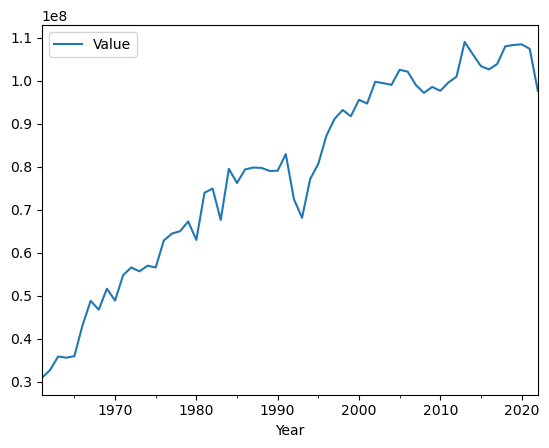

In [33]:
country_data.set_index('Year', inplace=True)
country_data.plot()

In [35]:
# # Pivot the DataFrame to get Years as columns and Countries as index 
# df_pivot = melted_df.pivot(index='Country', columns='Year', values='Value') 
# # Plot the data 
# df_pivot.plot(kind='bar', figsize=(10, 6))

In [37]:
melted_df['Country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Australia and New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean', 'Central African Republic', 'Central America',
       'Central Asia', 'Chad', 'Chile', 'China',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Czechia',
       'Czechoslovakia', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Eastern Africa', 'Eastern Asia',
       'Eastern Europe', 'Ecuador', '

In [40]:
# # Create a pivot table with 'Country' and 'Year' as index, and 'Item' and 'Unit' as columns
# pivot_df = melted_df.pivot_table(index=["Country", "Year"], 
#                                  columns=["Item", "Unit"],
#                                  values="Value")
# pivot_df.tail()

In [42]:
# # Flatten the multi-level column index
# pivot_df.columns = [f"{item} ({unit})" for item, unit in pivot_df.columns]
# pivot_df = pivot_df.reset_index()
# pivot_df.head()

In [44]:
world_population.info()
world_population.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    object 
dt

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [46]:
columns_to_drop2 =["2023 population", "cca3", "2022 population", "2020 population", "2015 population", "2010 population", "2000 population", "1990 population", "1980 population", "1970 population"]
world_population.drop(columns=columns_to_drop2, inplace=True)
world_population.rename(columns={"country": "Country", "continent": "Continent"}, inplace=True)
world_population.head()

,rank,Country,Continent,area (km²),density (km²),growth rate,world percentage
0,1,India,Asia,3287590.0,481,0.81%,17.85%
1,2,China,Asia,9706961.0,151,-0.02%,17.81%
2,3,United States,North America,9372610.0,37,0.50%,4.25%
3,4,Indonesia,Asia,1904569.0,148,0.74%,3.47%
4,5,Pakistan,Asia,881912.0,312,1.98%,3.00%


In [48]:
world_population_all_years.info()
world_population_all_years.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [50]:
columns_to_drop3 =["Indicator Code"]
world_population_all_years.drop(columns=columns_to_drop3, inplace=True)
world_population_all_years.rename(columns={"Country Name": "Country"}, inplace=True)
world_population_all_years.head()

,Country,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,"Population, total",130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,"Population, total",8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,"Population, total",97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,"Population, total",5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [52]:
merged_pop_data = pd.merge(world_population_all_years, world_population, on= "Country", how="inner")
merged_pop_data.info()
merged_pop_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           184 non-null    object 
 1   Country Code      184 non-null    object 
 2   Indicator Name    184 non-null    object 
 3   1960              184 non-null    float64
 4   1961              184 non-null    float64
 5   1962              184 non-null    float64
 6   1963              184 non-null    float64
 7   1964              184 non-null    float64
 8   1965              184 non-null    float64
 9   1966              184 non-null    float64
 10  1967              184 non-null    float64
 11  1968              184 non-null    float64
 12  1969              184 non-null    float64
 13  1970              184 non-null    float64
 14  1971              184 non-null    float64
 15  1972              184 non-null    float64
 16  1973              184 non-null    float64
 1

,Country,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2020,2021,2022,2023,rank,Continent,area (km²),density (km²),growth rate,world percentage
0,Aruba,ABW,"Population, total",54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,...,106585.0,106537.0,106445.0,106277.0,198,North America,180.0,590,-0.16%,0.00%
1,Afghanistan,AFG,"Population, total",8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,...,38972230.0,40099462.0,41128771.0,42239854.0,36,Asia,652230.0,65,2.70%,0.53%
2,Angola,AGO,"Population, total",5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,...,33428486.0,34503774.0,35588987.0,36684202.0,42,Africa,1246700.0,29,3.08%,0.46%
3,Albania,ALB,"Population, total",1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2837849.0,2811666.0,2777689.0,2745972.0,138,Europe,28748.0,103,-0.35%,0.04%
4,Andorra,AND,"Population, total",9443.0,10216.0,11014.0,11839.0,12690.0,13563.0,14546.0,...,77700.0,79034.0,79824.0,80088.0,203,Europe,468.0,170,0.33%,0.00%


In [54]:
merged_pop_data.to_csv("merged_pop_data.csv", index=False)

In [56]:
#Merge Ag and population data
final_merge = pd.merge(ag_df_fnl, merged_pop_data, on= "Country", how="inner")
final_merge.info()
final_merge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27919 entries, 0 to 27918
Columns: 138 entries, Country to world percentage
dtypes: float64(127), int64(2), object(9)
memory usage: 29.4+ MB


,Country,Item,Category,Unit,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,...,2020_y,2021_y,2022_y,2023,rank,Continent,area (km²),density (km²),growth rate,world percentage
0,Afghanistan,"Almonds, in shell",Nut,100 g/ha,NaN,NaN,NaN,NaN,NaN,NaN,...,38972230.0,40099462.0,41128771.0,42239854.0,36,Asia,652230.0,65,2.70%,0.53%
1,Afghanistan,"Almonds, in shell",Nut,t,0.0,0.0,0.0,0.0,0.0,0.0,...,38972230.0,40099462.0,41128771.0,42239854.0,36,Asia,652230.0,65,2.70%,0.53%
2,Afghanistan,Apples,Fruit,100 g/ha,68018.0,68018.0,68018.0,78298.0,82258.0,83212.0,...,38972230.0,40099462.0,41128771.0,42239854.0,36,Asia,652230.0,65,2.70%,0.53%
3,Afghanistan,Apples,Fruit,t,15100.0,15100.0,15100.0,18400.0,20400.0,22800.0,...,38972230.0,40099462.0,41128771.0,42239854.0,36,Asia,652230.0,65,2.70%,0.53%
4,Afghanistan,Apricots,Fruit,100 g/ha,66390.0,66390.0,66390.0,76863.0,80819.0,81619.0,...,38972230.0,40099462.0,41128771.0,42239854.0,36,Asia,652230.0,65,2.70%,0.53%


In [58]:
#Re-order Dataframe move Continent next to Country
columns = final_merge.columns.tolist()
category_index = columns.index('Continent')
columns.insert(1, columns.pop(category_index))
ag_pop_df = final_merge[columns]
ag_pop_df.head()

,Country,Continent,Item,Category,Unit,1961_x,1962_x,1963_x,1964_x,1965_x,...,2019_y,2020_y,2021_y,2022_y,2023,rank,area (km²),density (km²),growth rate,world percentage
0,Afghanistan,Asia,"Almonds, in shell",Nut,100 g/ha,NaN,NaN,NaN,NaN,NaN,...,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,36,652230.0,65,2.70%,0.53%
1,Afghanistan,Asia,"Almonds, in shell",Nut,t,0.0,0.0,0.0,0.0,0.0,...,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,36,652230.0,65,2.70%,0.53%
2,Afghanistan,Asia,Apples,Fruit,100 g/ha,68018.0,68018.0,68018.0,78298.0,82258.0,...,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,36,652230.0,65,2.70%,0.53%
3,Afghanistan,Asia,Apples,Fruit,t,15100.0,15100.0,15100.0,18400.0,20400.0,...,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,36,652230.0,65,2.70%,0.53%
4,Afghanistan,Asia,Apricots,Fruit,100 g/ha,66390.0,66390.0,66390.0,76863.0,80819.0,...,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,36,652230.0,65,2.70%,0.53%
